In [1]:
import numpy as np 
import pandas as pd 
import os
from json  import loads , dumps

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/swiggy-restaurants-dataset/data.json
/kaggle/input/swiggy-restaurants-dataset/swiggy.csv


## 1. Loading the swiggy dataset (JSON file)

In [2]:
file = open('/kaggle/input/swiggy-restaurants-dataset/data.json','r')
data = file.read()
file.close()
js = loads(data)

## 2. Dataset walkthrough 

#### 2.1) how many cities are present in the given dataset 

In [3]:
print(len(js.keys()))

623


#### 2.2) how many restaurants are present in a particular city 

In [4]:
print(len(js['Abohar']['restaurants'].keys()))

63


#### 2.3) All restaurant is serving how many number of different menu products category in Abohar?

In [5]:
for i in js['Abohar']['restaurants'].keys():
    print(js['Abohar']['restaurants'][i]['name'],'|',len(js['Abohar']['restaurants'][i]['menu'].keys()))

AB FOODS POINT | 17
Janta Sweet House | 21
theka coffee desi | 29
Singh Hut | 11
GRILL MASTERS | 16
Sam Uncle | 8
shere punjab veg | 8
Shri Balaji Vaishno Dhaba | 3
Hinglaj Kachori Bhandhar | 2
yummy hub | 2
CHAWLA SAAB THE JUICE MASTER | 17
Sethi Milk Badam | 2
Swastik Dhaba | 7
Jodhpuri Kachori | 1
Bharawan Da Dhaba | 7
Tandoori Nights | 8
Rahul Food | 0
Roll Express | 2
wah ji waah veg and non veg corner | 8
Shri Balaji fast food and Variety store | 15
FOODY MOOD | 7
PUNJABI TADKA | 3
PUNJABI TADKA CHICKEN HUB | 3
Royal Chicken | 7
Just Baked | 10
Picado International Food | 23
PubG Cafe | 20
Verma Dhaba | 4
Fresh Food Cafe | 23
NAVU PIZZA HOUSE | 6
Domino's Pizza | 10
Joker Cafe | 15
Deepak Dhaba | 4
FUN TIME (SHARMA DAIRY) | 3
Pari Healthy Food | 4
Bhatti Ki Rasoi | 2
SETHI PUNJABI RASOI | 6
Kurda Ram Desi Ghee Dhaba(Original & Famous) | 7
Paratha 24x7 | 3
NIKKU VEG THALI | 8
PARJAPATI FAST FOOD | 1
Ganesh Fast Food | 5
Mitran Da dhaba | 1
The Super Cafe | 2
chacha sweets house | 

#### 2.4) Find the Restaurants with no Menu in Abohar?

In [6]:
for i in js['Abohar']['restaurants'].keys():
    if len(js['Abohar']['restaurants'][i]['menu']) == 0:
        print(js['Abohar']['restaurants'][i]['name'],'|',i)
    

          

Rahul Food | 453869


#### 2.5) different cuisines surved in abohar 

In [7]:
cuisines = []
for i in js['Abohar']['restaurants'].keys():
    cuisines += (js['Abohar']['restaurants'][i]['cuisine'].split(','))
cuisines = list(set(cuisines))
print(len(cuisines))

22


#### 2.5) Most popular cuisine surved in Abohar(top 5)

In [8]:
pop_cui = []
for cuisine in cuisines:
    c = 0
    for i in js['Abohar']['restaurants'].keys():
        if cuisine in (js['Abohar']['restaurants'][i]['cuisine']):
            c += 1
    pop_cui.append([cuisine,c])
df = pd.DataFrame(pop_cui,columns =['item','freq'])
df[df['freq'] == max(df['freq'])]   #  it prints only one cuisine

,item,freq
21,Indian,31


In [9]:
## method 2 
pop_cui = []
for cuisine in cuisines:
    c = 0
    for i in js['Abohar']['restaurants'].keys():
        if cuisine in (js['Abohar']['restaurants'][i]['cuisine']):
            c += 1
    pop_cui.append([cuisine,c])
df = pd.DataFrame(pop_cui,columns =['item','freq'])
df.sort_values(by='freq',ascending=False).head(5)


,item,freq
21,Indian,31
2,North Indian,20
15,Beverages,10
3,Chinese,9
16,Fast Food,9


#### 2.6 ) average cost of eating outside in Abohar

In [10]:
cost = []
for i in js['Abohar']['restaurants'].keys():
    cost.append(int(js['Abohar']['restaurants'][i]['cost'].split(' ')[-1]))
avg_cost = (round(sum(cost)/len(cost),2))
print('Average cost of eating outside in abohar is : Rs. '+str(avg_cost))
       

Average cost of eating outside in abohar is : Rs. 232.7


#### 2.7) average cost of eating north indian in Abohar

In [11]:
price = []
for i in js['Abohar']['restaurants'].keys():
    if 'North Indian' in js['Abohar']['restaurants'][i]['cuisine']:
        price.append(int(js['Abohar']['restaurants'][i]['cost'].split(' ')[-1]))
print(sum(price)//len(price))

243


#### 2.8) Average cost of each cusine in Abohar 

In [12]:
avg_cuisine = []
for cuisine in cuisines:
    price = []
    for i in js['Abohar']['restaurants'].keys():
        if cuisine in js['Abohar']['restaurants'][i]['cuisine']:
            price.append(int(js['Abohar']['restaurants'][i]['cost'].split(' ')[-1]))
    avg_cuisine.append([cuisine,sum(price)//len(price)])
avg_cuisine = pd.DataFrame(avg_cuisine,columns = ['cuisine','avg_cost'])
avg_cuisine.head()

,cuisine,avg_cost
0,Sweets,166
1,Desserts,100
2,North Indian,243
3,Chinese,266
4,Continental,200


#### 2.8) top 5 expensive cuisine in Abohar

In [13]:
avg_cuisine.sort_values(by ='avg_cost',ascending=False).head()

,cuisine,avg_cost
6,Punjabi,700
11,Tandoor,475
18,Juices,300
17,Ice Cream,300
9,Pizzas,287


#### 2.9) top 5 cheapest cuisine in Abohar

In [14]:
avg_cuisine.sort_values(by ='avg_cost',ascending=True).head()

,cuisine,avg_cost
1,Desserts,100
10,Chaat,116
0,Sweets,166
14,Snacks,192
4,Continental,200


# 3.Dataset Walkthrough -whole
#### 3.1) how many restaurants are there in each city ?


In [15]:
rest_city = []
for i in js.keys():
    c = 0
    if 'restaurants' in js[i].keys():
        c = len(js[i]['restaurants'])
    else:
        for region in js[i].keys():
            if 'restaurants' in js[i][region].keys():
                c = len(js[i][region]['restaurants'])
    rest_city.append([i,c])

rest_city = pd.DataFrame(rest_city,columns=['city','total_restaurants'])
   

#### 3.2) top 5 cities maximum number of restaurants 

In [16]:
rest_city.sort_values(by = 'total_restaurants',ascending =False).head()

,city,total_restaurants
104,Bikaner,1673
545,Sirsa,1659
559,Sultanpur,1430
433,Noida-1,1428
49,Bangalore,1396


#### 3.3) how many restaurants have no menu or empty menu 

In [17]:
c = 0
arr = []
for city in js.keys():
    if 'restaurants' in js[city].keys():
        for rest in (js[city]['restaurants'].keys()):
            if 'menu' in js[city]['restaurants'][rest].keys():
                if (len(js[city]['restaurants'][rest]['menu'].keys()) == 0):
                    c += 1
                    arr.append([rest])
                else:
                    c += 1
                    arr.append([rest])
    else:
        for regions in (js[city].keys()):
            if 'restaurants' in js[city][regions].keys():
                for rest in js[city][regions]['restaurants'].keys():
                    if 'menu' in js[city][regions]['restaurants'][rest].keys():
                        if len(js[city][regions]['restaurants'][rest]['menu'].keys()) == 0:
                            c += 1
                            arr.append([rest])
                    else:
                        c += 1
                        arr.append([rest])
print(c)
arr = np.array(arr)
np.save('incompleted_rest_data.npy',arr) 

78863


#### 3.4) Top 5 most expensive cities to eat outside?

In [18]:
avg_cost = []
for city in js.keys():
    cost = []
    if 'restaurants' in js[city].keys():
        for rest in js[city]['restaurants'].keys():
            try:
                cost.append(int(js[city]['restaurants'][rest]['cost'].split(' ')[-1]))
            except:
                pass
    else:
        for region in js[city].keys():
            if 'restaurants' in (js[city][region].keys()):
                for rest in js[city][region]['restaurants'].keys():
                    try:
                        cost.append(int(js[city][region]['restaurants'][rest]['cost'].split(' ')[-1]))
                    except:
                        pass
    try:                
        avg_cost.append([city,sum(cost)//len(cost)])
    except:
        pass
df_ = pd.DataFrame(avg_cost,columns = ['city','avg_cost'])                    
df_.sort_values(by='avg_cost',ascending = False).head(5)

,city,avg_cost
217,Hinganghat,18962
495,South-goa,470
396,North-goa,468
184,Gangtok,466
363,Mussoorie,460


#### 3.5) top 5 most expensive cities to eat Indian?

In [19]:
ind_cuisine = []
for city in js.keys():
    cost = []
    if 'restaurants' in js[city].keys():
        for rest in (js[city]['restaurants'].keys()):
            try:
                if 'Indian' in js[city]['restaurants'][rest]['cuisine']:
                    try:
                        cost.append(int(js[city]['restaurants'][rest]['cost'].split(' ')[-1]))
                    except:
                        pass
            except:
                pass
        try:
            cost = sum(cost)//len(cost)    
        except:
            pass
    

    else:
        for regions in js[city].keys():
            if 'restaurants' in js[city][regions].keys():
                for rest in js[city][regions]['restaurants'].keys():
                    try:
                        if 'Indian' in js[city][region]['restaurants'][rest]['cuisine']:
                            try:
                                cost.append(int(js[city][region]['restaurants'][rest]['cost'].split(' ')[-1]))
                            except:
                                pass
                    except:
                        pass
                try:
                    cost = sum(cost)//len(cost)
                except:
                    pass
                    
    ind_cuisine.append([city,cost])

ind_cuisine = pd.DataFrame(ind_cuisine,columns = ['city','cost'])


cost = []
for i in ind_cuisine['cost']:
    if (str(i)== '[]'):
        cost.append(0)
    else:
        cost.append(int(i))
        
        
ind_cuisine['cost'] = cost
ind_cuisine.sort_values(by='cost',ascending= False).head()


,city,cost
237,Hinganghat,50241
202,Gangtok,460
397,Mussoorie,450
555,South-goa,449
434,North-goa,447


## Q1. Top 10 most common restaurant name in India 


In [20]:
dct = {}
for city in js.keys():
    if 'restaurants' in (js[city].keys()):
        for rest in (js[city]['restaurants'].keys()):
            if (js[city]['restaurants'][rest]['name']) not in dct:
                dct[js[city]['restaurants'][rest]['name']] = 1
            elif js[city]['restaurants'][rest]['name'] in dct:
                dct[js[city]['restaurants'][rest]['name']] += 1
                
    else:
        for subcity in js[city].keys():
            if 'restaurants' in  js[city][subcity].keys():
                for rest in (js[city][subcity]['restaurants'].keys()):
                    if (js[city][subcity]['restaurants'][rest]['name']) not in dct:
                        dct[js[city][subcity]['restaurants'][rest]['name']] = 1
                    elif js[city][subcity]['restaurants'][rest]['name'] in dct:
                        dct[js[city][subcity]['restaurants'][rest]['name']] += 1
    
    
top_rest = pd.DataFrame()    
top_rest['Restaurants_name'] = dct.keys()
top_rest['most_count'] = dct.values()
top_rest.sort_values(by='most_count',ascending=False).head(10)

,Restaurants_name,most_count
30,Domino's Pizza,481
110,Pizza Hut,364
104,KFC,352
88,Kwality Walls Frozen Dessert and Ice Cream Shop,333
197,Baskin Robbins,321
137,Subway,271
853,The Good Bowl,237
812,Faasos - Wraps & Rolls,236
850,The Biryani Life,235
833,Oven Story Pizza,232


## Q2. Top 10 most common restaurant name in Bangalore

In [21]:
res = {}
for subcity in js['Bangalore'].keys():
    for rest in (js['Bangalore'][subcity]['restaurants'].keys()):
        if (js['Bangalore'][subcity]['restaurants'][rest]['name']) not in res:
            res[js['Bangalore'][subcity]['restaurants'][rest]['name']] = 1
        else:
            res[js['Bangalore'][subcity]['restaurants'][rest]['name']] += 1
            
com_rest = pd.DataFrame()    
com_rest['Restaurants_name'] = dct.keys()
com_rest['most_count'] = dct.values()
com_rest.sort_values(by='most_count',ascending=False).head(10)

,Restaurants_name,most_count
30,Domino's Pizza,481
110,Pizza Hut,364
104,KFC,352
88,Kwality Walls Frozen Dessert and Ice Cream Shop,333
197,Baskin Robbins,321
137,Subway,271
853,The Good Bowl,237
812,Faasos - Wraps & Rolls,236
850,The Biryani Life,235
833,Oven Story Pizza,232


## Q3. Total number of Dominos Branches 

In [22]:
print('Total Number of Dominos Branches :')
top_rest[top_rest.Restaurants_name == "Domino's Pizza"].most_count

Total Number of Dominos Branches :


30    481
Name: most_count, dtype: int64

# Visualisation 

## Q4. Compare the number of Branches KFC, MacD , Dominos and Subway (Visualisation)


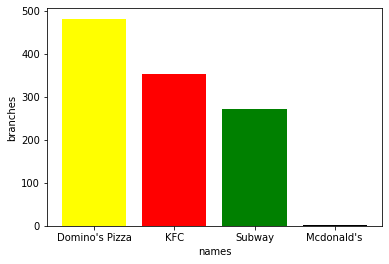

In [23]:
import matplotlib.pyplot as plt 
names    = []
branches = []
for i in top_rest.values:
    if (i[0] == "KFC") or (i[0] == "Domino's Pizza") or (i[0] == "Subway") or (i[0] == "Mcdonald's"):
        names.append(i[0])
        branches.append(i[1])
        
        
plt.bar(names,branches,color = ['yellow','red','green','black'])
plt.xlabel('names')
plt.ylabel('branches')
plt.show()

## Q5. Top Most Popular Cuisines in terms of number of restaurants serving 

In [24]:
dct = {}
for city in js.keys():
    if 'restaurants' in js[city].keys():
        for rest in (js[city]['restaurants'].keys()):
            if 'cuisine' in js[city]['restaurants'][rest].keys():
                for cuisines in (js[city]['restaurants'][rest]['cuisine'].split(',')):
                    if cuisines in dct:
                        dct[cuisines] += 1
                    else:
                        dct[cuisines] = 1
            else:
                 for cuisines in js[city]['restaurants'][rest]['type'].split(','):
                    if cuisines in  dct:
                        dct[cuisines] += 1 
                    else:
                        dct[cuisines] = 1
    else:
        for subcity in js[city].keys():
            if 'restaurants' in js[city][subcity].keys():
                for rest in (js[city][subcity]['restaurants'].keys()):
                    if 'cuisine' in js[city][subcity]['restaurants'][rest].keys():
                        for cuisines in (js[city][subcity]['restaurants'][rest]['cuisine'].split(',')):
                            if cuisines in  dct:
                                dct[cuisines] += 1 
                            else:
                                dct[cuisines] = 1
                    else:
                        for cuisines in js[city][subcity]['restaurants'][rest]['type'].split(','):
                            if cuisines in  dct:
                                dct[cuisines] += 1 
                            else:
                                dct[cuisines] = 1
                            
cuisines = pd.DataFrame({'cuisine':dct.keys(),'total':dct.values()})

# taking only top 10 cuisine 
cuisines = cuisines.sort_values('total',ascending = False).head(10)

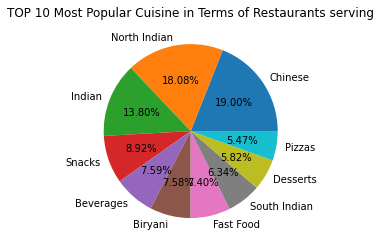

In [25]:
# visualization 
plt.pie(cuisines['total'],labels=cuisines['cuisine'],autopct = '%1.2f%%')
plt.title('TOP 10 Most Popular Cuisine in Terms of Restaurants serving')
plt.show()

 ## Q6. Ratio of veg and non-veg restaurants in India

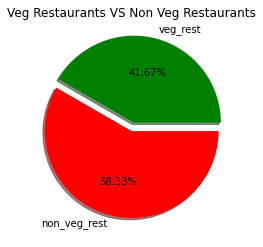

In [26]:
veg_rest = 0
non_veg_rest = 0
for city in js.keys():
    if 'restaurants' in js[city].keys():
        for rest in js[city]['restaurants'].keys():
            veg = 0
            nonveg = 0
            if 'menu' in js[city]['restaurants'][rest].keys():
                for menu in (js[city]['restaurants'][rest]['menu']):
                    for food in (js[city]['restaurants'][rest]['menu'][menu].keys()):
                        if js[city]['restaurants'][rest]['menu'][menu][food]['veg_or_non_veg'] == 'Veg':   
                            veg += 1                  # counting the number of veg items in the menu of each and every restaurants
                        else:
                            nonveg += 1
                if nonveg == 0:                       # if no noveg dishes are present in the menu then we consider the restaurant to be pure veg else non veg restaurant
                    veg_rest += 1
                else:
                    non_veg_rest += 1 
            else:
                pass
    else:
        for subcity in js[city].keys():
            if 'restaurants' in js[city].keys():
                for rest in js[city][subcity]['restaurants'].keys():
                    veg = 0
                    nonveg = 0
                    for menu in (js[city][subcity]['restaurants'][rest]['menu']):
                        for food in js[city][subcity]['restaurants'][rest]['menu'][menu].keys():
                            if js[city]['restaurants'][rest]['menu'][menu][food]['veg_or_non_veg'] == 'Veg':
                                veg += 1
                            else:
                                nonveg += 1
                    if nonveg == 0:
                        veg_rest += 1
                    else:
                        non_veg_rest += 1 

plt.pie([veg_rest,non_veg_rest],labels =['veg_rest','non_veg_rest'],autopct ='%1.2f%%',explode =[0.1,0],shadow =True,colors=['green','red'])
plt.title('Veg Restaurants VS Non Veg Restaurants')
plt.show()
